In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

In [2]:
import random
random_index = random.randint(0, 100)
image_path = f"IMAGES/{random_index:03}.png"
mask_path = f"IMAGES/{random_index:03}mask.png"
img = Image.open(image_path)
mask = Image.open(mask_path)
img_small = img.resize((256, 256))
np_img = np.array(img_small)
np_img = np_img / 255.0
np_img = np.expand_dims(np_img, axis=0)
model = load_model("unet_football.h5")
prediction = model.predict(np_img)[0]
model.summary()



1/1 [==============================] - 1s 585ms/step
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_57 (Conv2D)          (None, 256, 256, 64)         1792      ['input_4[0][0]']             
                                                                                                  
 conv2d_58 (Conv2D)          (None, 256, 256, 64)         36928     ['conv2d_57[0][0]']           
                                                                                                  
 max_pooling2d_12 (MaxPooli  (None, 128, 128, 64)         0         ['conv2d_58[0][0]']           
 ng2D)                               

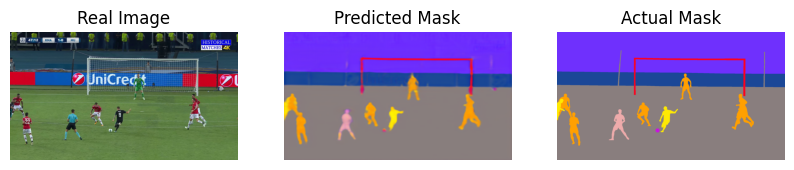

In [3]:
prediction_img = Image.fromarray((prediction * 255).astype(np.uint8))
prediction_img = prediction_img.resize((1920, 1080))
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
axes[0].imshow(img)
axes[0].set_title('Real Image')
axes[0].axis('off')
axes[1].imshow(prediction_img, cmap='gray')
axes[1].set_title('Predicted Mask')
axes[1].axis('off')
axes[2].imshow(mask, cmap='gray')
axes[2].set_title('Actual Mask')
axes[2].axis('off')
plt.show()